In [515]:
# **Preparacion de Los Datos**

In [516]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

df = pd.read_csv('/kaggle/input/data-set/amazon.csv')


df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


#  **Exploración y Limpieza de Datos**
 
 

**Información básica del DataFrame**

In [517]:
# Información básica del DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**Estadísticas descriptivas de las características numéricas**

In [518]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


**Preprocesamiento de Datos**

**Eliminamos Duplicados**

In [519]:

df.drop_duplicates(inplace=True)

**Llenar valores faltantes hacia adelante**

In [520]:
df.ffill(inplace=True)

# **Conversión de Precios a Formato Numérico**

**Función para convertir precios a formato numérico**

In [521]:
# Función para convertir precios a formato numérico
def convert_price(price):
    if isinstance(price, float):
        return price
    try:
        return float(price.replace('₹', '').replace(',', '').strip())
    except ValueError:
        return None

**Aplicar la función a las columnas de precio**

In [522]:
df['discounted_price'] = df['discounted_price'].apply(convert_price)
df['actual_price'] = df['actual_price'].apply(convert_price)

**Eliminar filas con valores no numéricos en las columnas de precio**

In [523]:
# Eliminar filas con valores no numéricos en las columnas de precio
df = df.dropna(subset=['discounted_price', 'actual_price'])


**Verificar los datos convertidos**

In [524]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# **Codificación de la Variable Objetivo**

**Convertir la variable categórica 'category' a valores numéricos**

In [525]:
# Convertir la variable categórica 'category' a valores numéricos
df['category'] = pd.Categorical(df['category']).codes

# Verificar la conversión
print(df['category'].head())

0    10
1    10
2    10
3    10
4    10
Name: category, dtype: int16


**Verificar la conversión**

In [526]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,10,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,10,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,10,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,10,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,10,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [527]:

# Asegurarse de que otras columnas numéricas no tengan valores no numéricos
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Eliminar filas con valores no numéricos en las columnas de rating y rating_count
df = df.dropna(subset=['discounted_price', 'actual_price', 'rating', 'rating_count'])

# Verificar la limpieza
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 20 to 1462
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           326 non-null    object 
 1   product_name         326 non-null    object 
 2   category             326 non-null    int16  
 3   discounted_price     326 non-null    float64
 4   actual_price         326 non-null    float64
 5   discount_percentage  326 non-null    object 
 6   rating               326 non-null    float64
 7   rating_count         326 non-null    float64
 8   about_product        326 non-null    object 
 9   user_id              326 non-null    object 
 10  user_name            326 non-null    object 
 11  review_id            326 non-null    object 
 12  review_title         326 non-null    object 
 13  review_content       326 non-null    object 
 14  img_link             326 non-null    object 
 15  product_link         326 non-null    object

In [528]:


# Verificar que todas las columnas numéricas sean del tipo correcto
numeric_columns = ['discounted_price', 'actual_price', 'rating', 'rating_count']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores no numéricos
df = df.dropna(subset=numeric_columns)

# Verificar que no queden valores no numéricos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 20 to 1462
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           326 non-null    object 
 1   product_name         326 non-null    object 
 2   category             326 non-null    int16  
 3   discounted_price     326 non-null    float64
 4   actual_price         326 non-null    float64
 5   discount_percentage  326 non-null    object 
 6   rating               326 non-null    float64
 7   rating_count         326 non-null    float64
 8   about_product        326 non-null    object 
 9   user_id              326 non-null    object 
 10  user_name            326 non-null    object 
 11  review_id            326 non-null    object 
 12  review_title         326 non-null    object 
 13  review_content       326 non-null    object 
 14  img_link             326 non-null    object 
 15  product_link         326 non-null    object

# **Normalización de Características**

 **Seleccionar características numéricas para normalizar**

In [529]:

# Seleccionar características numéricas para normalizar
numeric_features = ['discounted_price', 'actual_price', 'rating', 'rating_count']

# Aplicar StandardScaler a las características numéricas
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Verificar los datos normalizados
print(df.head())

    product_id                                       product_name  category  \
20  B09C6HXFC1  Duracell USB Lightning Apple Certified (Mfi) B...        10   
28  B09W5XR9RT  Duracell USB C To Lightning Apple Certified (M...        10   
32  B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...        10   
33  B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...        10   
37  B09RZS1NQT  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...        10   

    discounted_price  actual_price discount_percentage    rating  \
20         -0.214697     -0.259604                 46%  1.283201   
28         -0.214697     -0.232288                 51%  1.034050   
32         -0.366677     -0.355211                 65%  0.784900   
33         -0.311744     -0.423502                  0%  0.784900   
37         -0.416378     -0.368869                 80%  0.037449   

    rating_count                                      about_product  \
20      1.764095  Supports Ios Devices With M

 **Aplicar StandardScaler a las características numéricas**

**Verificar los datos normalizados**

# **Selección de Características y División del Dataset**

**Seleccionar características y variable objetivo**

In [530]:
X = df[['discounted_price', 'rating']]  # Agrega más características si es necesario
y = df['category']  # o cualquier otra variable objetivo


**Dividir en conjuntos de entrenamiento y prueba**

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Entrenamiento del Modelo K-NN**

In [532]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

**Crear y entrenar el modelo K-NN**

In [533]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Realizar predicciones**

In [534]:
y_pred = knn.predict(X_test)

In [535]:
visualization_df = X_test.copy()
visualization_df['true_label'] = y_test
visualization_df['predicted_label'] = y_pred

# 

Accuracy: 0.18181818181818182
Classification Report:
               precision    recall  f1-score   support

          10       0.18      1.00      0.31        12
          15       1.00      0.00      0.00         1
          18       1.00      0.00      0.00         1
          23       1.00      0.00      0.00         1
          27       1.00      0.00      0.00         1
          31       1.00      0.00      0.00         2
          75       1.00      0.00      0.00         1
          84       1.00      0.00      0.00         1
          89       1.00      0.00      0.00         2
          93       1.00      0.00      0.00         9
          94       1.00      0.00      0.00         1
          97       1.00      0.00      0.00         2
          98       1.00      0.00      0.00         1
         107       1.00      0.00      0.00         1
         112       1.00      0.00      0.00         1
         117       1.00      0.00      0.00         1
         119       1.00    

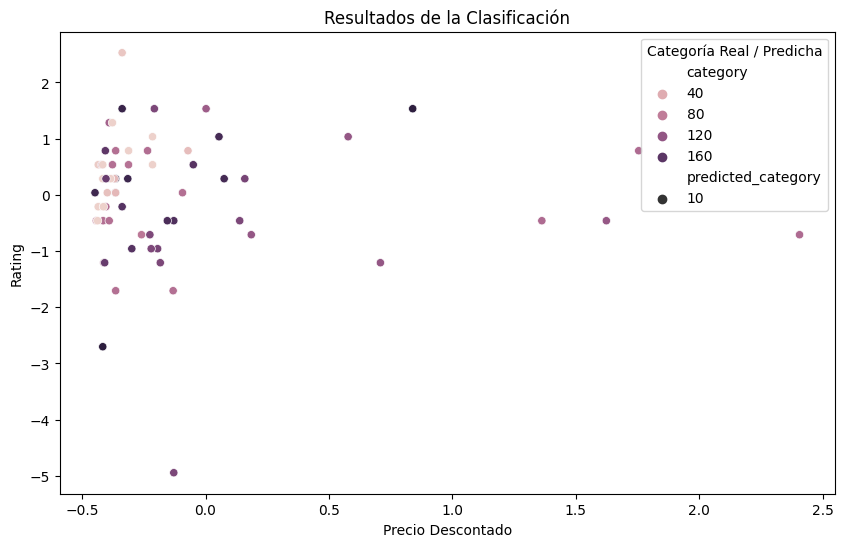

In [536]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

# Supongamos que tienes un DataFrame df con las columnas 'discounted_price', 'rating' y 'category'
df.reset_index(drop=True, inplace=True)

# Dividir los datos en entrenamiento y prueba
X = df[['discounted_price', 'rating']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y predecir con un modelo (usamos DummyClassifier para la demostración)
model = DummyClassifier(strategy="most_frequent")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular la precisión y el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Crear un DataFrame de prueba utilizando los índices de X_test
test_df = df.loc[X_test.index]

# Añadir las predicciones al DataFrame de prueba usando .loc
test_df.loc[:, 'predicted_category'] = y_pred

# Visualización de Resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', hue='category', style='predicted_category', data=test_df)
plt.title('Resultados de la Clasificación')
plt.xlabel('Precio Descontado')
plt.ylabel('Rating')
plt.legend(title='Categoría Real / Predicha')
plt.show()

